In [1]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [2]:
# Generate synthetic images and corresponding (x, y) labels

def generate_dataset(num_samples):

    images = []
    labels = []

    for _ in range(num_samples):
        image = np.zeros((50, 50), dtype=np.float32)

        x = np.random.randint(0, 50)
        y = np.random.randint(0, 50)

        image[y, x] = 255.0
        image /= 255.0  # normalize

        images.append(image)
        labels.append([x, y])

    images = np.array(images).reshape(-1, 50, 50, 1)
    labels = np.array(labels)

    return images, labels


In [3]:
# Create training and validation datasets

X, y = generate_dataset(num_samples=6000)

X_train, X_val = X[:5000], X[5000:]
y_train, y_val = y[:5000], y[5000:]


In [4]:
# Build a CNN model for coordinate regression

def build_model():

    model = Sequential([
        Conv2D(16, (3, 3), activation='relu',
               input_shape=(50, 50, 1)),
        Conv2D(32, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(2)  # Output: x, y
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='mean_squared_error'
    )
    return model


model = build_model()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     4,333,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,338,562 (16.55 MB)

 Trainable params: 4,338,562 (16.55 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model and record training logs

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32
)


Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 284ms/step - loss: 0.7889 - val_loss: 0.9045
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 161ms/step - loss: 0.7803 - val_loss: 0.6870
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 169ms/step - loss: 0.5816 - val_loss: 1.1227
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - loss: 0.7386 - val_loss: 1.0739
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 44s 187ms/step - loss: 0.7261 - val_loss: 0.8031
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 173ms/step - loss: 0.8891 - val_loss: 0.7116
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 181ms/step - loss: 0.7020 - val_loss: 0.6509
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 191ms/step - loss: 0.5039 - val_loss: 1.1096
Epoch 9/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 188ms/step - loss: 0.5533 - val_loss: 0.3937
Epoch 10/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 184ms/step - loss: 0.2827 - val_loss: 0.3815
Epoch 11/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 189ms/step - loss: 0.2925 - val_loss: 0.4753
Epoch 12/15
157/157

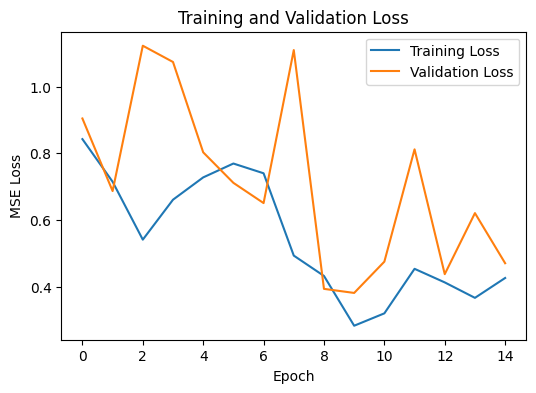

In [7]:
# Plot training and validation loss curves

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


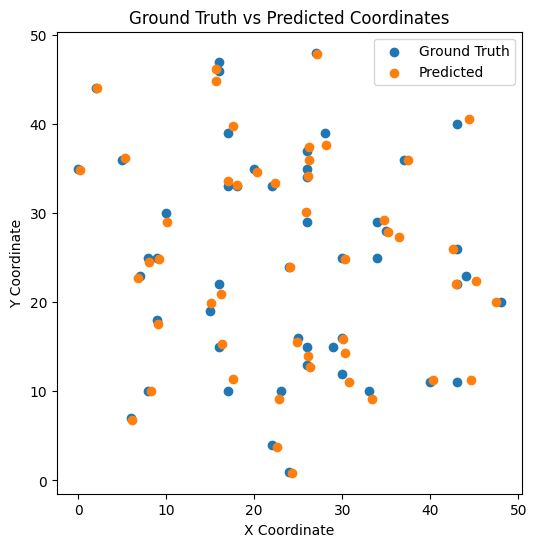

In [8]:
# Compare ground truth and predicted coordinates

predictions = model.predict(X_val[:50])

plt.figure(figsize=(6, 6))
plt.scatter(y_val[:50, 0], y_val[:50, 1], label='Ground Truth')
plt.scatter(predictions[:, 0], predictions[:, 1], label='Predicted')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Ground Truth vs Predicted Coordinates')
plt.legend()
plt.show()


In [9]:
# Display a few sample prediction results

for i in range(5):
    print(
        f"Actual: {y_val[i]}, "
        f"Predicted: {predictions[i].astype(int)}"
    )


Actual: [ 8 10], Predicted: [ 8 10]
Actual: [ 9 18], Predicted: [ 9 17]
Actual: [18 33], Predicted: [18 33]
Actual: [26 13], Predicted: [26 12]
Actual: [ 0 35], Predicted: [ 0 34]
